In [171]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
%matplotlib inline

Masters_Data = pd.DataFrame(pd.read_csv
                            ('/Users/MattPettit/Downloads/graduate-admissions/Admission_Predict_Ver1.1.csv'))



In [136]:
NBA.corr()

,W,PTS,oppPTS,ORB,DRB,STL,BLK,TOV
W,1.000000,0.298826,-0.331573,-0.095737,0.470897,0.116194,0.203921,-0.243186
PTS,0.298826,1.000000,0.789075,0.496921,0.090291,0.430990,0.152055,0.427138
oppPTS,-0.331573,0.789075,1.000000,0.551880,-0.212627,0.343480,0.030767,0.582413
ORB,-0.095737,0.496921,0.551880,1.000000,-0.269179,0.492941,0.201105,0.545987
DRB,0.470897,0.090291,-0.212627,-0.269179,1.000000,-0.331128,0.242991,-0.190957
STL,0.116194,0.430990,0.343480,0.492941,-0.331128,1.000000,0.120456,0.464075
BLK,0.203921,0.152055,0.030767,0.201105,0.242991,0.120456,1.000000,0.241569
TOV,-0.243186,0.427138,0.582413,0.545987,-0.190957,0.464075,0.241569,1.000000


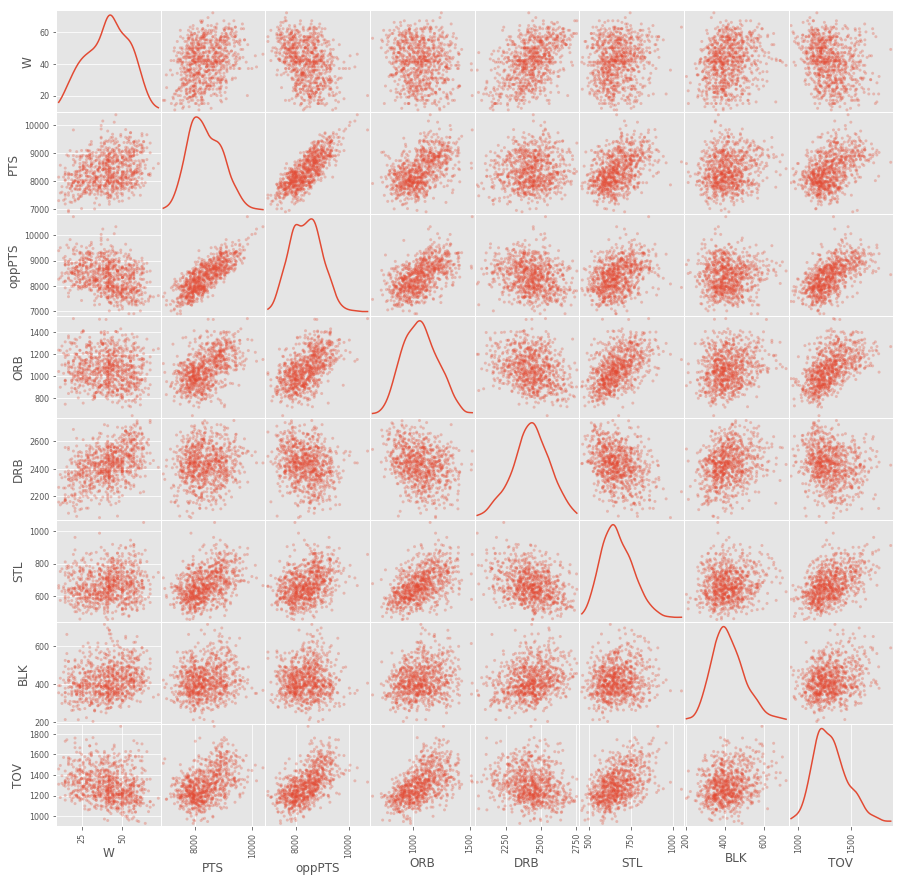

In [138]:
plt.style.use('ggplot')
scatter_matrix(NBA, alpha=.3, figsize=(15,15), diagonal='kde')
plt.show()

In [140]:
y = pd.DataFrame(NBA.iloc[:,0])
X = pd.DataFrame(NBA.iloc[:,1:8])

In [141]:
model = sm.OLS(y, X)

In [142]:
results = model.fit()

In [143]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.031e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:22:22   Log-Likelihood:                -2173.2
No. Observations:                 835   AIC:                             4360.
Df Residuals:                     828   BIC:                             4394.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0306      0.000     79.412      0.000       0.030       0.031
oppPTS        -0.0297      0.000    -83.149      0.000      -0.030      -0.029
ORB            0.0003      0.001      0.337      0.736      -0.002       0.002
DRB            0.0121      0.001     19.401      0.000       0.011       0.013
STL            0.0076      0.002      4.968      0.000       0.005       0.011
BLK            0.0028      0.002      1.852      0.064      -0.000       0.006
TOV           -0.0020      0.001     -1.884      0.060      -0.004    8.29e-05
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.140
Skew:                           0.120   Prob(JB):                        0.343
Kurtosis:                       3.066   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
inflation = pd.DataFrame()
inflation['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
inflation["features"] = X.columns
inflation

,VIF,features
0,810.230399,PTS
1,695.890568,oppPTS
2,95.861396,ORB
3,177.332122,DRB
4,82.789055,STL
5,33.477658,BLK
6,146.634068,TOV
